In [57]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()


In [58]:
dir(iris)


['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [59]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [61]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
df['target'] = iris.target

In [63]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [66]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [67]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df[df.target == 2].tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [70]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0, 0.5, 'sepal width (cm)')

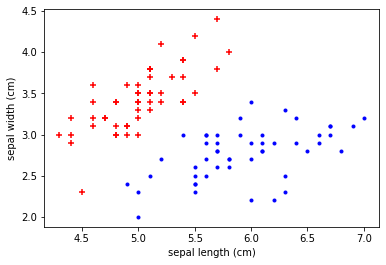

In [71]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker=".")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

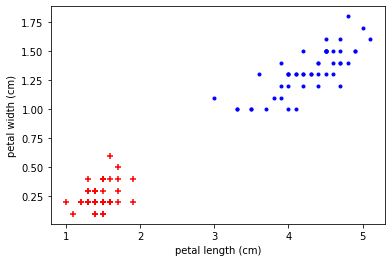

In [72]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker="+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker=".")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [73]:
from sklearn.model_selection import train_test_split

x = df.drop(['target', 'flower_name'], axis='columns')
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
y = df.target


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [76]:
len(x_train), len(x_test)

(120, 30)

# KNN clasifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [78]:
knn.score(x_test, y_test)

1.0

In [82]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix()

y_pred =  knn.predict(x_test)

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

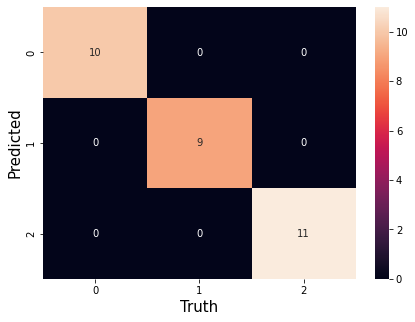

In [92]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('Truth', fontsize=15)

iris.target_names   # 0 = setosa, 1 = versicolor, 2 = virginica
# predictions: 10 setosa, 9 versicolor, 11 verginca

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

